# Model

## Introduction

This model aims to find the best pricing strategy for each time period for the Autonomous Electric Vehicle System(AEVS) operator, based on the game between the government, the AEVS operator, and the Public Transport(PT) operator. The game between the government and the operators is a sequential game, and the game between two operators is a simultaneous game. This gamme theory based pricing model can be summarized as following steps:

- Step1: Iterate over Time Periods to Make Time Varied Strategies
- Step2: For each Time Period, Iterate over Government Tax Decisions
- Step3: Simulate Operators' Pricing Decisions under Tax Decision
- Step4: Keep the Tax Decision with Maximum Government Payoff, Take Pricing Decisions under this Tax Decision

## Parameters:
- $D_{\tau,i,j}$: Transportation demand from node $i$ to node $j$ during time interval $\tau$.
- $d_{i,j}$: Distance between node $i$ and node $j$.
- $q^{\text{AEVS}}$: The parameter evaluating the quality of SEAV service.
- $q^{\text{PT}}$: The parameter evaluating the quality of PT service.
- $q^{\text{SB}}$: The parameter evaluating the quality of Share Bikes(SB) service.
- $\alpha$: The price coefficient evaluating the influence of price on customers' tendency on operator choosing.
- $\beta$: The service quality coefficient evaluating the influence of service quality on customers' tendency on operator choosing.
- $\gamma$: The distance coefficient evaluating the influence of distance on customers' tendency on operator choosing.
- $\delta$: The environment coefficient evaluating the influence of per gram ${\text{CO}}_2$ emissions on environment.
- $M$: The capacity of buses operated by PT operator.

## Variables:
- $t^{\text{AEVS}} \in T^{\text{AEVS}}$: tax rate for AEVS operator per passenger per transportation distance.
- $t^{\text{PT}} \in T^{\text{PT}}$: tax rate for PT operator per passenger per transportation distance.
- $p^{\text{AEVS}} \in P^{\text{AEVS}}$: unit distance prices for AEVS operator per passenger.
- $p^{\text{PT}} \in P^{\text{PT}}$: ticket prices for PT operator per passenger.
- $D^{\text{AEVS}}_{\tau,i,j}$: Transportation demand achieved by AEVS operator from node $i$ to node $j$ during time interval $\tau$.
- $D^{\text{PT}}_{\tau,i,j}$: Transportation demand achieved by PT operator from node $i$ to node $j$ during time interval $\tau$.
- $W^{\text{AEVS}}_{\tau,i,j}$: Customer cost by AEVS service from node $i$ to node $j$ during time interval $\tau$.
- $W^{\text{PT}}_{\tau,i,j}$: Customer cost by PT service from node $i$ to node $j$ during time interval $\tau$.
- $U^{\text{AEVS}}_{\tau}$: Payoff function of AEVS operator during time interval $\tau$.
- $U^{\text{PT}}_{\tau}$: Payoff function of PT operator during time interval $\tau$.
- $U^{\text{tax}}_{\tau}$: Payoff function of the government from the perspective of tax revenue during time interval $\tau$.
- $U^{\text{env}}_{\tau}$: Payoff function of the government from the perspective of environment revenue during time interval $\tau$.

## Constraints:

The idea of Multinomial Logit (MNL) model is applied here to describe the customers' decision between two operators. The Multinomial Logit (MNL) model is a popular statistical model used primarily in the field of econometrics and transportation planning to predict the probability of choices among discrete alternatives. It belongs to a broader class of logistic regression models and is particularly useful when decision-makers are faced with multiple choices, such as transportation modes, product selections, or any scenario where choices are mutually exclusive.

First, a utility function is applied to show how the variables affect the dicision of customers. A linear utility function is normally defined as followed:

$$ f = \alpha X_1 + \beta X_2 + \gamma X_3 + \epsilon $$

Where:
- $ X_1, X_2, X_3 $ are the explanatory variables which might include factors such as cost, time, accessibility, and other relevant attributes.
- $ \alpha, \beta, \gamma $ are the coefficients to be estimated.
- $ \epsilon $ is the error terms, assumed to follow an independent and identically distributed Gumbel distribution.

Then suppose that a decision-maker has a choice among $J$ alternatives. The probability that alternative $j$ is chosen can be given by:

$$P_{j} = \frac{\exp(f_j)}{\sum_{k=1}^{J} \exp(f_k)}$$

Moreover, note that error terms $\epsilon$ are assumed to follow independent and identically distributed Gumbel distribution. The use of the Gumbel distribution leads directly to the logistic formula for choice probabilities. This property simplifies the computation and allows for efficient estimation techniques.

In this game, customers have three choices: AEVS, PT and Shared Bikes(SB). the utility functions for AEVS, PT and SB are defined as followed:

$$ f^{\text{AEVS}}_{\tau,i,j} = -\alpha p^{\text{AEVS}} d_{i,j} + \beta q^{\text{AEVS}} + \gamma \log{d_{i,j}} + \epsilon^{SAEV} $$

$$ f^{\text{PT}}_{\tau,i,j} = -\alpha p^{\text{PT}} + \beta q^{\text{PT}} + \epsilon^{PT} $$

$$ f^{\text{SB}}_{\tau,i,j} =  \beta q^{\text{SB}} - \gamma \log{d_{i,j}} + \epsilon^{SB} $$

For AEVS operator, three variables can affect the customers' tendency on operator choosing: travel cost, service quality and distance. For the travel cost and service quality, the coefficient is directly multiplied to the variable, while for the distance, a logarithmic transformation is applied to the distance. In economic terms, the logarithmic function could reflect decreasing marginal utility of travel with respect to distance. As people travel farther, each additional unit of distance provides a smaller increase in utility compared to the previous unit. This is aligned with the broader economic concept of diminishing returns. Moreover, compared to $f^{\text{PT}}_{\tau,i,j}$, there is no distance factor in $f^{\text{PT}}_{\tau,i,j}$. Distance might have a more pronounced effect on the choice to use SAEV compared to PT. For instance, SAEVs might be preferred for shorter or very long distances due to convenience and cost-effectiveness at those ranges, while PT might be more consistently chosen for mid-range distances without as direct a sensitivity to slight changes in distance. Further, for SB services, no cost effect since the services is assumed to be free, but a negative logarithmic relationship to distance which means this service is less chosen as distance increaces.

The probability of choosing AEVS service and PT service are assumed to be:

$$ Prob^{\text{AEVS}}_{\tau,i,j} = \frac{\exp(f^{\text{AEVS}}_{\tau,i,j})}{\exp(f^{\text{AEVS}}_{\tau,i,j}) + \exp(f^{\text{PT}}_{\tau,i,j}) + \exp(f^{\text{SB}}_{\tau,i,j})} $$

$$ Prob^{\text{PT}}_{\tau,i,j} = \frac{\exp(f^{\text{PT}}_{\tau,i,j})}{\exp(f^{\text{AEVS}}_{\tau,i,j}) + \exp(f^{\text{PT}}_{\tau,i,j}) + \exp(f^{\text{SB}}_{\tau,i,j})} $$

Therefore, the distribution of total traffic demand on the two operators can be expressed by:

$$ D^{\text{AEVS}}_{\tau,i,j} = Prob^{\text{AEVS}}_{\tau,i,j} D_{\tau,i,j} $$

$$ D^{\text{PT}}_{\tau,i,j} = Prob^{\text{PT}}_{\tau,i,j} D_{\tau,i,j} $$

## Players:

- Government: Decides on the tax levels for Autonomous Alectric Vehicle Systems(AEVS) operator and Public Transportation(PT) operator.

- AEVS operator: Decides on the per-unit distance price.

- PT operator: Decides on the ticket price, irrespective of the distance.

## Strategies:

- Government:
  - $T^{\text{AEVS}}$: The set of tax rate for AEVS operator per passenger per transportation distance. $T^{\text{AEVS}} = \{0.05, 0.1, 0.15, 0.2\}$.
  - $T^{\text{PT}}$: The set of tax rate for PT operator per passenger per transportation distance. $T^{\text{PT}} = \{0.01, 0.02, 0.03, 0.04\}$.

- AEVS operator: Decides on the base price and per-unit distance price.
  - $P^{\text{AEVS}}$: The set of unit distance prices for AEVS operator per passenger. $P^{\text{AEVS}} = \{0, 0.5, 1, 1.5, 2\}$.

- PT operator: Decides on the ticket price, irrespective of the distance.
  - $P^{\text{PT}}$: The set of ticket prices for PT operator per passenger. $P^{\text{PT}} = \{0, 1, 2, 3, 4\}$.

## Payoffs:

- Government:
  - Tax Revenue: $U^{\text{tax}}_{\tau} = \sum_{i}\sum_{j} t^{\text{AEVS}} d_{i,j} D^{\text{AEVS}}_{\tau,i,j} + t^{\text{PT}} d_{i,j} D^{\text{PT}}_{\tau,i,j}$, $\forall \tau$.
  - Environment Revenue: <br> According to a report by world bank, the average ${\text{CO}}_2$ emission of Tesla Model 3, which can be considered as a simulation of average emission of AEVS fleet, is 376.3g ${\text{CO}}_2$ per kilometer. This emission happens in battery production, other parts production and electricity generation. Meanwhile, according to the case study of Shenzhen Bus Group Company(SZBG), the average ${\text{CO}}_2$ emission of the electric bus fleet is 572.3g ${\text{CO}}_2$ per kilometer. (https://documents1.worldbank.org/curated/en/708531625052490238/pdf/Electrification-of-Public-Transport-A-Case-Study-of-the-Shenzhen-Bus-Group.pdf, page103 and page109). Hence the environment revenue can be expressed as: $$U^{\text{env}}_{\tau} = - 376.3 \delta (\sum_{i}\sum_{j} d_{i,j} D^{\text{AEVS}}_{\tau,i,j}) - 572.3 \delta (\sum_{i}\sum_{j} d_{i,j} \lceil \frac{D^{\text{PT}}_{\tau,i,j}}{M} \rceil),\forall \tau. $$ <br> That is, for each OD pair, the environment revenue for AEVS is emission coefficient $\delta$ multiplies ${\text{CO}}_2$ emission per vehicle per km multiplies distance in km multiplies vehicle numbers which is exactly travel demand. Meanwhile, for PT, the vehicle number is not exactly travel demand but the minimal integer larger than or equal to travel demand divided by bus capacity.


- AEVS operator: $U^{\text{AEVS}}_{\tau} = \sum_{i}\sum_{j} (p^{\text{AEVS}} - t^{\text{AEVS}}) \cdot d_{i,j} \cdot D^{\text{AEVS}}_{\tau,i,j}$, $\forall \tau$.

- PT operator: $U^{\text{PT}}_{\tau} = \sum_{i}\sum_{j} (p^{\text{PT}} - t^{\text{PT}} \cdot d_{i,j}) \cdot D^{\text{PT}}_{\tau,i,j}$, $\forall \tau$.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import math

In [2]:
# Parameters for the game
TIME_INTERVALS = 36  # Number of time intervals
NODES = 25  # Number of nodes

alpha = 0.4  # price elasticity coefficient
beta = 0.5   # quality factor coefficient
gamma = 0.1  # distance effect coefficient

Q_SAEV = 10    # quality and convenience factor for SAEV
Q_PT = 8      # quality and convenience factor for PT
Q_SB = 1      # quality and convenience factor for SB

delta = 0.001 # CO2 emission coefficient
M = 27 # capacity of a bus


In [3]:
# Load the demand data D from Excel file
file_path = 'all_traveling_orders.xlsx'  # Replace with the actual path
xl = pd.ExcelFile(file_path)

# Initialize a three-dimensional NumPy array to store the demand data
D = np.empty((len(xl.sheet_names), NODES, NODES))

# Read demand data for all time intervals
for i, sheet in enumerate(xl.sheet_names):
    D[i] = xl.parse(sheet, header=None).values

In [4]:
# Load the distance data d from Excel file
file_path = 'distance.xlsx'  # Replace with the actual path
xl = pd.read_excel(file_path, header=None)

# Transform into Numpy array
d = xl.values

In [5]:
# Sequential game between government and operators
T_AEVS = np.linspace(0, 1, 2)
T_PT = np.linspace(0, 0.5, 2)

In [6]:
P_unit = np.linspace(0, 2, 5)
print(P_unit)
P_ticket = np.linspace(0, 10, 5)
print(P_ticket)

[0.  0.5 1.  1.5 2. ]
[ 0.   2.5  5.   7.5 10. ]


In [7]:
np.random.seed(42)
epsilon_SAEV = np.random.gumbel(loc=0, scale=1, size=1)
epsilon_PT = np.random.gumbel(loc=0, scale=1, size=1)
epsilon_SB = np.random.gumbel(loc=0, scale=1, size=1)

def D_AEVS(t, i, j, p_unit, p_ticket):
    exp_SAEV = np.exp(beta * Q_SAEV - alpha * p_unit * d[i, j] + gamma * np.log(d[i, j]) + epsilon_SAEV)
    exp_PT = np.exp(beta * Q_PT - alpha * p_ticket + epsilon_PT)
    exp_SB = np.exp(beta * Q_SB - gamma * np.log(d[i, j]) + epsilon_SB)
    return ((exp_SAEV / (exp_SAEV + exp_PT + exp_SB)))*D[t,i,j]

def D_PT(t, i, j, p_unit, p_ticket):
    exp_SAEV = np.exp(beta * Q_SAEV - alpha * p_unit * d[i, j] + gamma * np.log(d[i, j]) + epsilon_SAEV)
    exp_PT = np.exp(beta * Q_PT - alpha * p_ticket + epsilon_PT)
    exp_SB = np.exp(beta * Q_SB - gamma * np.log(d[i, j]) + epsilon_SB)
    return ((exp_PT / (exp_SAEV + exp_PT + exp_SB)))*D[t,i,j]

In [8]:
def U_AEVS(t, p_unit, p_ticket, t_AEVS):
    U = 0
    for i in range(NODES):
        for j in range(NODES):
            if j != i:
                U = U + (p_unit-t_AEVS)*d[i,j]*D_AEVS(t,i,j,p_unit,p_ticket)
    return U

def U_PT(t, p_unit, p_ticket, t_PT):
    U = 0
    for i in range(NODES):
        for j in range(NODES):
            if j != i:
                U = U + (p_ticket-t_PT*d[i,j])*D_PT(t,i,j,p_unit,p_ticket)
    return U

def U_tax(t, p_unit, p_ticket, t_AEVS, t_PT):
    U = 0
    for i in range(NODES):
        for j in range(NODES):
            if j != i:
                U = U + t_AEVS*d[i,j]*D_AEVS(t,i,j,p_unit,p_ticket) + t_PT*d[i,j]*D_PT(t,i,j,p_unit,p_ticket)
    return U

def U_env(t, p_unit, p_ticket):
    U = 0
    for i in range(NODES):
        for j in range(NODES):
            if j != i:
                U = U - 367.3*delta*d[i,j]*D_AEVS(t,i,j,p_unit,p_ticket) - 572.3*delta*d[i,j]*math.ceil(D_PT(t,i,j,p_unit,p_ticket)/M)
    return U

In [9]:
def find_nash_equilibria(U1, U2):
    m, n = U1.shape  # Number of strategies for Players 1 and 2 respectively
    equilibria = []

    for i in range(m):  # Iterate over Player 1's strategies
        for j in range(n):  # Iterate over Player 2's strategies
            # Check if i is a best response for Player 1
            best_response_p1 = U1[i, j] == np.max(U1[:, j])
            # Check if j is a best response for Player 2
            best_response_p2 = U2[i, j] == np.max(U2[i, :])

            if best_response_p1 and best_response_p2:
                equilibria.append((i, j))

    return equilibria

In [10]:
optimal_strategies = []

for t in range(TIME_INTERVALS):
    best_government_payoff = -np.inf  # Initialize to a very low number
    best_strategy = None

    for t_AEVS in T_AEVS:
        for t_PT in T_PT:
            U1 = np.zeros((5, 5))
            U2 = np.zeros((5, 5))

            for a, p_unit in enumerate(P_unit):
                for b, p_ticket in enumerate(P_ticket):
                    U1[a,b] = U_AEVS(t, p_unit, p_ticket, t_AEVS)
                    U2[a,b] = U_PT(t, p_unit, p_ticket, t_PT)
            
            equilibria = find_nash_equilibria(U1, U2)
            # Calculate government payoff for each equilibrium and update the best strategy if needed
            for eq in equilibria:
                p_unit = P_unit[eq[0]]
                p_ticket = P_ticket[eq[1]]
                gov_payoff = U_tax(t, p_unit, p_ticket, t_AEVS, t_PT) + U_env(t, p_unit, p_ticket)
                
                if gov_payoff > best_government_payoff:
                    best_government_payoff = gov_payoff
                    best_strategy = {
                        'time': t,
                        't_AEVS': t_AEVS,
                        't_PT': t_PT,
                        'p_unit': p_unit,
                        'p_ticket': p_ticket,
                        'gov_payoff': best_government_payoff
                    }

    # Store the best strategy for this time interval
    optimal_strategies.append(best_strategy)

# Print or use the optimal strategies as needed
for strategy in optimal_strategies:
    print(strategy)

/tmp/ipykernel_150543/2734789029.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U1[a,b] = U_AEVS(t, p_unit, p_ticket, t_AEVS)
/tmp/ipykernel_150543/2734789029.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U2[a,b] = U_PT(t, p_unit, p_ticket, t_PT)
/tmp/ipykernel_150543/1358703640.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U = U - 367.3*delta*d[i,j]*D_AEVS(t,i,j,p_unit,p_ticket) - 572.3*delta*d[i,j]*math.ceil(D_PT(t,i,j,p_unit,p_ticket)/M)


{'time': 0, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-73.92678214])}
{'time': 1, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-204.41669312])}
{'time': 2, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-253.63862419])}
{'time': 3, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-251.59328961])}
{'time': 4, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-230.3435517])}
{'time': 5, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-177.13614108])}
{'time': 6, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-25.75731069])}
{'time': 7, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-187.87033581])}
{'time': 8, 't_AEVS': 1.0, 't_PT': 0.5, 'p_unit': 2.0, 'p_ticket': 10.0, 'gov_payoff': array([-284.90921099])}
{'ti

In [11]:
U1

array([[-1848.25973963, -1898.77845072, -1918.06776404, -1925.26325377,
        -1927.92397971],
       [ -472.74579128,  -601.5731129 ,  -695.71388972,  -754.38093088,
         -785.37503345],
       [    0.        ,     0.        ,     0.        ,     0.        ,
            0.        ],
       [   82.66371206,   142.31626561,   202.4917291 ,   247.77438047,
          274.27221143],
       [   62.81681638,   125.46252008,   206.41731344,   278.42861566,
          323.60615226]])

In [12]:
U2

array([[-4.07039632e+01, -8.67443276e+00, -7.28103090e-01,
         6.52706066e-01,  5.79923718e-01],
       [-4.70222459e+02, -2.42870037e+02, -1.13244999e+02,
        -4.42134221e+01, -1.28191264e+01],
       [-7.30765757e+02, -4.11265565e+02, -1.92779233e+02,
        -6.15253947e+01, -3.07454801e+00],
       [-8.40141689e+02, -4.64469572e+02, -1.89101583e+02,
        -2.69914151e+01,  3.31957767e+01],
       [-8.88625792e+02, -4.82852139e+02, -1.63040735e+02,
         2.03109248e+01,  7.35136000e+01]])

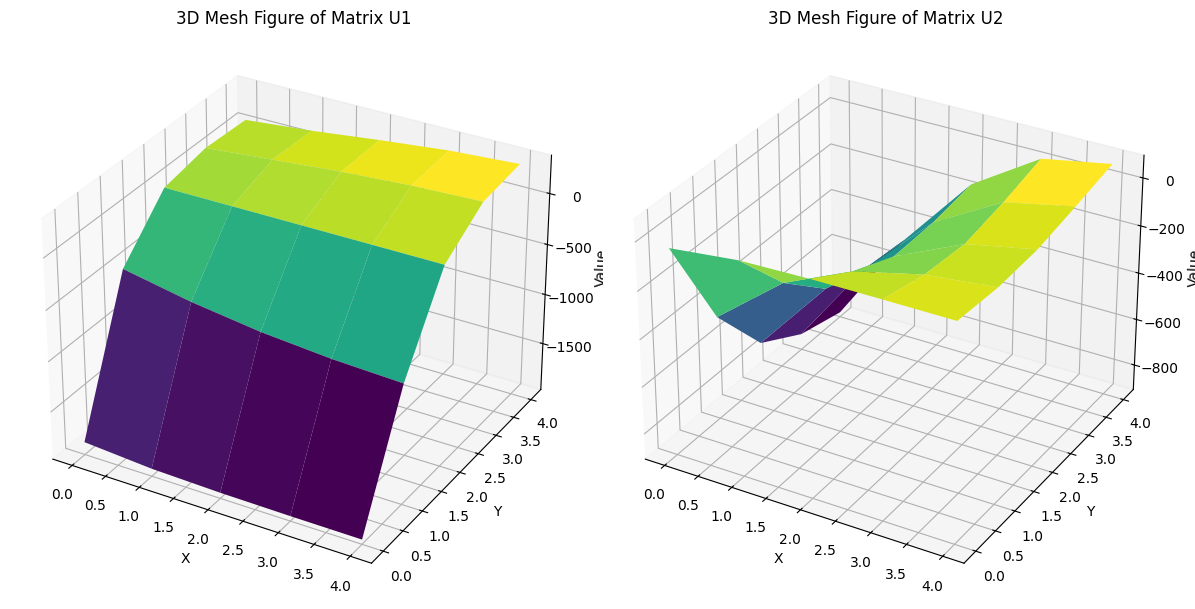

In [13]:
import matplotlib.pyplot as plt

# Example matrices
matrix1 = U1
matrix2 = U2

# Create meshgrids for x and y coordinates
x, y = np.meshgrid(np.arange(matrix1.shape[1]), np.arange(matrix1.shape[0]))

# Flatten the matrices for z coordinates
z1 = matrix1.flatten()
z2 = matrix2.flatten()

# Create two separate 3D plots
fig = plt.figure(figsize=(12, 6))

# Plot for U1
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, matrix1, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Value')
ax1.set_title('3D Mesh Figure of Matrix U1')

# Plot for U2
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, matrix2, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Value')
ax2.set_title('3D Mesh Figure of Matrix U2')

# Show the plots
plt.tight_layout()
plt.show()
